In [1]:
import pandas as pd
import numpy as np
import seaborn as ns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
def porcentNull(video_juegos):
    null_sumary = pd.DataFrame()
    for name_column in video_juegos.columns:    
        cont_null = np.sum(pd.isnull(video_juegos[name_column]))
        r = pd.DataFrame({
            'columna': [name_column],
            'cantidad_nulos': [cont_null],
            'Porcentaje': [cont_null/video_juegos[name_column].shape[0]]
        })
        null_sumary = pd.concat([ null_sumary, r])
    return null_sumary

In [3]:
df = pd.read_csv('csv/fifa/players_19.csv')

In [4]:
list_n = []

In [5]:
count = 0
for i in df.dtypes:    
    if (i == 'int64') | (i == 'float64'):
        list_n.append(count)
    count = count +1

In [6]:
l_number = pd.DataFrame( { 'indice' : list_n})

In [7]:
list_name = []
list_index = []

In [8]:
index = 0
for i in df.columns:
    list_name.append( i )
    list_index.append( index )
    index = index +1

In [9]:
d_name_index = pd.DataFrame( { 'name' : list_name, 'indice': list_index})

In [10]:
print(d_name_index.shape)
print(l_number.shape)

(104, 2)
(27, 1)


### Obtenemos las columnas numericas

In [11]:
columns_categoric = pd.merge(d_name_index, l_number, on=['indice'], how="outer", indicator=True)
columns_categoric = columns_categoric[columns_categoric['_merge'] == 'left_only']

In [12]:
columns_categoric =columns_categoric['name'].values

In [13]:
columns_to_use =  d_name_index.merge(l_number, how='inner', on='indice')

In [14]:
columns_to_use = columns_to_use['name'].values

In [15]:
df_number = df.loc[:, columns_to_use ].copy()   

In [16]:
df_number.head(2)

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0      20801   33        187         83       94         94   77000000   
1     158023   31        170         72       94         94  110500000   

   wage_eur  international_reputation  weak_foot  ...  passing  dribbling  \
0    405000                         5          4  ...     81.0       89.0   
1    565000                         5          4  ...     88.0       96.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       35.0    79.0        NaN          NaN         NaN          NaN   
1       32.0    61.0        NaN          NaN         NaN          NaN   

   gk_speed  gk_positioning  
0       NaN             NaN  
1       NaN             NaN  

[2 rows x 27 columns]

In [17]:
porcentNull(df_number)

columna  cantidad_nulos  Porcentaje
0                 sofifa_id               0    0.000000
0                       age               0    0.000000
0                 height_cm               0    0.000000
0                 weight_kg               0    0.000000
0                   overall               0    0.000000
0                 potential               0    0.000000
0                 value_eur               0    0.000000
0                  wage_eur               0    0.000000
0  international_reputation               0    0.000000
0                 weak_foot               0    0.000000
0               skill_moves               0    0.000000
0        release_clause_eur            1513    0.085144
0        team_jersey_number             223    0.012549
0      contract_valid_until             223    0.012549
0      nation_jersey_number           16666    0.937873
0                      pace            1986    0.111761
0                  shooting            1986    0.111761
0                   passing            1986    0.111761
0                 dribbling            1986    0.111761
0                 defending            1986    0.111761
0                    physic            1986    0.111761
0                 gk_diving           15784    0.888239
0               gk_handling           15784    0.888239
0                gk_kicking           15784    0.888239
0               gk_reflexes           15784    0.888239
0                  gk_speed           15784    0.888239
0            gk_positioning           15784    0.888239

### Columnas a descartar
Se considera descartar las siguientes columnas por tener gran cantidad de valores nulos

In [18]:
clean_columns = [
    'sofifa_id', 'age',
    'height_cm', 'weight_kg',
    'overall', 'potential',
    'value_eur', 'wage_eur',
    'international_reputation', 'weak_foot',
    'skill_moves', 'release_clause_eur',
    'team_jersey_number', 'contract_valid_until',
    'pace','shooting', 'passing', 'dribbling',
    'defending','physic'
]

df_number = df_number.loc[:, clean_columns].copy()

In [19]:
porcentNull( df_number)

columna  cantidad_nulos  Porcentaje
0                 sofifa_id               0    0.000000
0                       age               0    0.000000
0                 height_cm               0    0.000000
0                 weight_kg               0    0.000000
0                   overall               0    0.000000
0                 potential               0    0.000000
0                 value_eur               0    0.000000
0                  wage_eur               0    0.000000
0  international_reputation               0    0.000000
0                 weak_foot               0    0.000000
0               skill_moves               0    0.000000
0        release_clause_eur            1513    0.085144
0        team_jersey_number             223    0.012549
0      contract_valid_until             223    0.012549
0                      pace            1986    0.111761
0                  shooting            1986    0.111761
0                   passing            1986    0.111761
0                 dribbling            1986    0.111761
0                 defending            1986    0.111761
0                    physic            1986    0.111761

In [20]:
df_number = df_number.loc[
    ~(  pd.isnull(df_number['release_clause_eur']) | pd.isnull(df_number['team_jersey_number']) |
        pd.isnull(df_number['contract_valid_until']) | pd.isnull(df_number['pace']) |
        pd.isnull(df_number['shooting']) | pd.isnull(df_number['passing']) |
        pd.isnull(df_number['dribbling']) | pd.isnull(df_number['defending']) |  pd.isnull(df_number['physic']) 
    ), :].copy()

In [21]:
porcentNull(df_number)

columna  cantidad_nulos  Porcentaje
0                 sofifa_id               0         0.0
0                       age               0         0.0
0                 height_cm               0         0.0
0                 weight_kg               0         0.0
0                   overall               0         0.0
0                 potential               0         0.0
0                 value_eur               0         0.0
0                  wage_eur               0         0.0
0  international_reputation               0         0.0
0                 weak_foot               0         0.0
0               skill_moves               0         0.0
0        release_clause_eur               0         0.0
0        team_jersey_number               0         0.0
0      contract_valid_until               0         0.0
0                      pace               0         0.0
0                  shooting               0         0.0
0                   passing               0         0.0
0                 dribbling               0         0.0
0                 defending               0         0.0
0                    physic               0         0.0

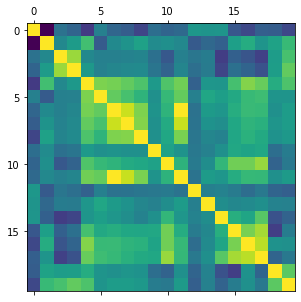

In [22]:
df_corr = df_number.corr()
plt.matshow(df_corr)

### PCA Principal Component Analysis

In [23]:
col_to_use_pca = ['age','height_cm','weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur',
                  'international_reputation', 'weak_foot', 'skill_moves', 'release_clause_eur',
                  'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling','defending','physic']

In [24]:
x = df_number.loc[ :, col_to_use_pca].values

In [25]:
x = StandardScaler().fit_transform(x)

In [26]:
pca = PCA(n_components=5)

In [27]:
principalComponents = pca.fit_transform(x)

In [28]:
pca_df = pd.DataFrame( data=principalComponents, columns=['ca1','ca2','ca3','ca4','ca5'])

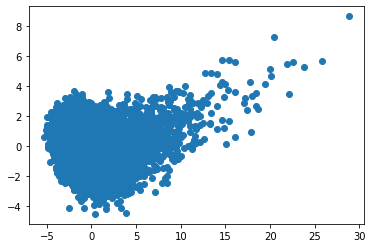

In [29]:
plt.scatter( pca_df['ca1'], pca_df['ca4'])

In [30]:
km = KMeans( n_clusters =4).fit(pca_df)

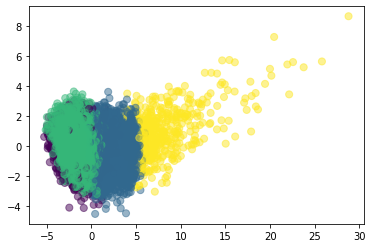

In [31]:
plt.scatter(pca_df['ca1'], pca_df['ca4'], c=km.labels_.astype(float), s=50, alpha=0.5)

In [32]:
df_number['cluster'] = km.labels_

In [33]:
df_number

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0          20801   33        187         83       94         94   77000000   
1         158023   31        170         72       94         94  110500000   
2         190871   26        175         68       92         93  118500000   
4         192985   27        181         70       91         92  102000000   
5         155862   32        184         82       91         91   51000000   
...          ...  ...        ...        ...      ...        ...        ...   
17765     238985   19        180         72       47         61      60000   
17766     240160   18        178         75       47         61      60000   
17767     241304   20        181         64       47         61      60000   
17768     240158   19        179         73       47         59      40000   
17769     243961   19        180         72       47         58      50000   

       wage_eur  international_reputation  weak_foot  ...  release_clause_eur  \
0        405000                         5          4  ...         127100000.0   
1        565000                         5          4  ...         226500000.0   
2        290000                         5          5  ...         228100000.0   
4        355000                         4          5  ...         196400000.0   
5        380000                         4          3  ...         104600000.0   
...         ...                       ...        ...  ...                 ...   
17765      1000                         1          3  ...            131000.0   
17766      1000                         1          3  ...            125000.0   
17767      1000                         1          3  ...            167000.0   
17768      1000                         1          3  ...             66000.0   
17769      1000                         1          3  ...             88000.0   

       team_jersey_number  contract_valid_until  pace  shooting  passing  \
0                     7.0                2022.0  90.0      93.0     81.0   
1                    10.0                2021.0  88.0      91.0     88.0   
2                    10.0                2022.0  92.0      84.0     83.0   
4                    17.0                2023.0  77.0      86.0     92.0   
5                     4.0                2020.0  75.0      63.0     71.0   
...                   ...                   ...   ...       ...      ...   
17765                27.0                2021.0  52.0      32.0     46.0   
17766                24.0                2021.0  64.0      43.0     40.0   
17767                26.0                2018.0  81.0      35.0     47.0   
17768                33.0                2020.0  63.0      42.0     38.0   
17769                19.0                2018.0  56.0      36.0     46.0   

       dribbling  defending  physic  cluster  
0           89.0       35.0    79.0        3  
1           96.0       32.0    61.0        3  
2           95.0       32.0    59.0        3  
4           87.0       60.0    78.0        3  
5           71.0       91.0    84.0        3  
...          ...        ...     ...      ...  
17765       45.0       46.0    49.0        2  
17766       52.0       23.0    53.0        2  
17767       49.0       44.0    52.0        2  
17768       50.0       41.0    56.0        2  
17769       44.0       42.0    50.0        2  

[14396 rows x 21 columns]

In [34]:
import plotly.express as px

In [35]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [36]:
fig = px.scatter( principalComponents, x=0, y=1, color=df_number['cluster'] )

In [37]:
for i, feature in enumerate(col_to_use_pca):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1 = loadings[i, 1]
    )
    fig.add_annotation(
        x = loadings[i, 0],
        y = loadings[i, 1],
        ax=0, ay=0,
        xanchor = 'center',
        yanchor = 'bottom',
        text = feature,
    )

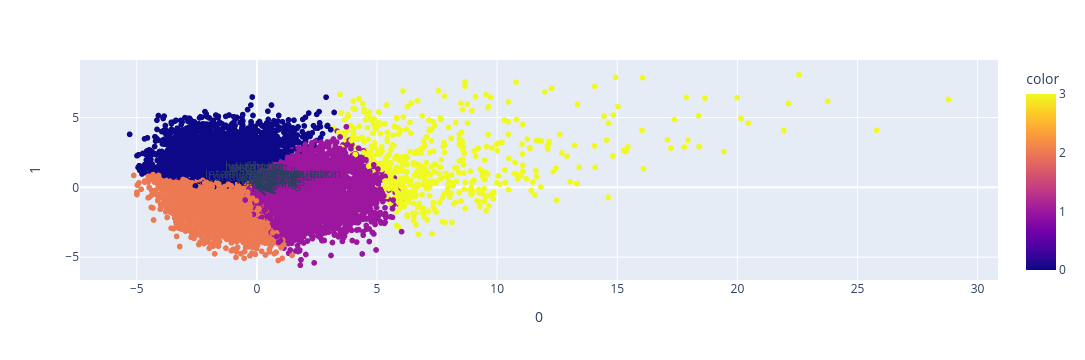

In [40]:
fig.show()

In [45]:
y = df.loc[ :, ['sofifa_id', 'short_name', 'club']].merge(df_number, on='sofifa_id', how='inner')

In [46]:
y.loc[ y['cluster']==3, ['short_name', 'club']]

short_name                 club
0     Cristiano Ronaldo             Juventus
1              L. Messi         FC Barcelona
2             Neymar Jr  Paris Saint-Germain
3          K. De Bruyne      Manchester City
4          Sergio Ramos          Real Madrid
...                 ...                  ...
937        T. Vermaelen         FC Barcelona
938            Llorente    Tottenham Hotspur
982          C. Benteke       Crystal Palace
987          D. Welbeck              Arsenal
1379     Renato Sanches    FC Bayern München

[530 rows x 2 columns]

In [47]:
y.loc[ y['cluster']==1, ['short_name', 'club']]

short_name                club
225             Joaquín          Real Betis
226         David Villa    New York City FC
268      Juiano Mestres            Cruzeiro
269    Rosberto Dourado    Atlético Mineiro
289         J. Martínez      Atlanta United
...                 ...                 ...
11004         M. Austin      Newcastle Jets
11026       K. Yamamoto        Júbilo Iwata
11158        L. Pizarro          Godoy Cruz
11548         R. Harley  Milton Keynes Dons
11555     B. Ziegenbein  FC Energie Cottbus

[5411 rows x 2 columns]